In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageOps
import numpy as np
import os
import glob

In [2]:
# #데이터 준비
# (독립, 종속), (독립2, 종속2) = tf.keras.datasets.cifar10.load_data()
# #print(독립.shape, 종속.shape)

# 독립r = 독립.reshape(50000, 32, 32, 3)
# 독립2r = 독립2.reshape(10000, 32, 32, 3)

# # 종속 데이터를 1차원 배열로 변환
# 종속 = pd.get_dummies(종속.ravel())
# #print(종속)
# # print(독립r.shape, 종속.shape)
# # plt.imshow(독립2[1])

In [3]:
dataset_path = os.path.join(os.getcwd(), 'dataset', 'stones_png')
label_names = os.listdir(dataset_path)

images = []
labels = []

for label in label_names:
    label_path = os.path.join(dataset_path, label)
    if os.path.isdir(label_path):
        image_files = os.listdir(label_path)
        for image_file in image_files:
            image_path = os.path.join(label_path,image_file)
            images.append(image_path)
            labels.append(label)



In [23]:
from PIL import Image
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# dataset_path = os.path.join(os.getcwd(), 'dataset', 'stones_png')
dataset_path = os.path.join(os.getcwd(), 'Dataset_JPG', 'All')
label_names = os.listdir(dataset_path)

processed_images = []
processed_labels = []

targetX = 256
targetY = 256
target_size = (targetX, targetY)  # 목표 크기

for label in label_names:
    label_path = os.path.join(dataset_path, label)
    if os.path.isdir(label_path):
        image_files = os.listdir(label_path)
        for image_file in image_files:
            image_path = os.path.join(label_path, image_file)
            try:
                img = Image.open(image_path)
                # 이미지 크기 조정 및 채널 변환
                img = img.resize(target_size).convert('RGB')
                # 이미지를 NumPy 배열로 변환하고 정규화
                img_array = np.array(img) / 255.0
                # 이미지 데이터와 라벨을 리스트에 추가
                processed_images.append(img_array)
                processed_labels.append(label)
            except Exception as e:
                print(f"Error processing {image_path}: {e}")

# NumPy 배열로 변환
processed_images = np.array(processed_images)
processed_labels = np.array(processed_labels)

# 라벨을 숫자로 인코딩
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(processed_labels)

# 라벨을 원-핫 인코딩
one_hot_labels = to_categorical(encoded_labels)

독립 = processed_images
종속 = one_hot_labels

독립r = processed_images.reshape(len(processed_images), targetX, targetY, 3)

In [26]:
import tensorflow as tf
#모델 만들기
X = tf.keras.layers.Input(shape=[targetX, targetY, 3], name='input_layer')
H = tf.keras.layers.Conv2D(3, kernel_size=5, activation='swish') (X)
H = tf.keras.layers.Conv2D(6, kernel_size=5, activation='swish') (H)
H = tf.keras.layers.Flatten() (H)
H = tf.keras.layers.Dense(84, activation='swish') (H)
Y = tf.keras.layers.Dense(6, activation='softmax') (H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(tf.__version__)
tf.config.list_physical_devices()


2.13.1


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

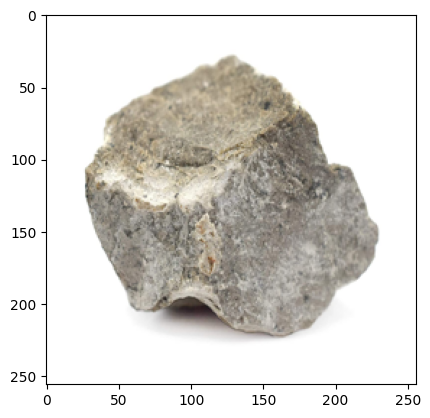

In [25]:
plt.imshow(독립[300])


In [27]:
#모델 학습하기
model.fit(독립r, 종속, epochs=15)

#모델 구조 확인
#model.summary()

Epoch 1/15
 9/54 [====>.........................] - ETA: 47s - loss: 113.8279 - accuracy: 0.2257

KeyboardInterrupt: 

In [ ]:

image_list = []
image_listR = []
gray_image_list = []
gray_image_listR = []
inverted_gray_image_list = []
inverted_gray_image_listR = []

def ImageSetting(file_name, number):
    # image_path = os.path.join(os.getcwd(), file_name)
    image_path = glob.glob('./stones_reform/*/*.png')
    image = Image.open(image_path)
    gray_image = image.convert('L')
    inverted_gray_image = ImageOps.invert(gray_image)
    image_array = np.array(image)
    gray_image_array = np.array(gray_image)
    inverted_gray_image_array = np.array(inverted_gray_image)
    image_arrayR = image_array.reshape(1, 784)
    gray_image_arrayR = image_array.reshape(1, 784)
    inverted_gray_image_arrayR = inverted_gray_image_array.reshape(1, 784)

    image_list.insert(number, image_array)
    image_listR.insert(number, image_arrayR)
    gray_image_list.insert(number, gray_image_array)
    gray_image_listR.insert(number, gray_image_arrayR)
    inverted_gray_image_list.insert(number, inverted_gray_image_array)
    inverted_gray_image_listR.insert(number, inverted_gray_image_arrayR)




In [ ]:
image_path = glob.glob('./')
print(image_path)

In [18]:
#모델 이용
loss, accuracy = model.evaluate(독립r, 종속)

pred = model.predict(독립r[70:90])
print("정확도: ",accuracy) #<--- 정확도 출력 방법 찾아보기
pd.DataFrame(pred).round(2)
# plt.imshow(독립r[0])
#print("값은: ", 종속)

1/1 [==============================] - 0s 190ms/step
정확도:  1.0


,0,1
0,1.00,0.00
1,1.00,0.00
2,1.00,0.00
3,1.00,0.00
4,1.00,0.00
5,1.00,0.00
6,1.00,0.00
7,1.00,0.00
8,1.00,0.00
9,1.00,0.00


In [19]:
# 모델 저장하기
model.save('rock classification')

# 모델 불러오기
# loaded_model = load_model('mymodel')

INFO:tensorflow:Assets written to: rock classification\assets


INFO:tensorflow:Assets written to: rock classification\assets


In [ ]:
#print(종속[0:100])
plt.imshow(독립[2])
#image_arrayR = image_array.reshape(3136, 784)
#print(gray_image_array)
